# WORKING DOC

### Import Libraries and Dependencies

In [1]:
# Import libraries and dependencies
import os
import ccxt
import warnings
# import pyEX as p
import numpy as np
import pandas as pd
from pathlib import Path
from datetime import datetime
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import hvplot.pandas

warnings.filterwarnings('ignore')
%matplotlib inline

### Import Environment Variables

In [2]:
# Load environment variables
load_dotenv()

# Import environment variables
kraken_public_key = os.getenv("KRAKEN_PUBLIC_KEY")
kraken_secret_key = os.getenv("KRAKEN_SECRET_KEY")

# Verify that environment variables were loaded
print(f"Kraken key data type: {kraken_public_key}")
print(f"Kraken secren data type: {kraken_secret_key}")

Kraken key data type: nGws9fAsOY5TMzDpGbCHs8jDXhuUFkLAkwR1qwZw08lkxS27IFs15JAG
Kraken secren data type: B3TTZY6YQm2NJwp2EhyIXjPdHFIx4NPbwvgRyS5gORiShOFqBvYV7kRsPI7YuUke3Yf4U4VobBMNT5ag2DKwUQ==


### Set Public and Private Keys for Kraken Exchange via the CCXT library

In [3]:
# Set the public and private keys for the API
exchange = ccxt.kraken({
    'apiKey': kraken_public_key,
    'secret': kraken_secret_key,
})

### Connect to Kraken and Load Available Cyptocurrency Data

### List Available Cryptocurrencies for Trading

### Fetch Historical Data for LINK/USDT

In [4]:
# Fetch daily candlestick bar data from `BTC/USD`
historical_prices = exchange.fetch_ohlcv("LINK/USDT", "1d")
historical_prices[10]

[1603584000000, 12.57089, 12.82563, 11.87094, 12.16142, 919.67794996]

In [5]:
# Import the data as a Pandas DataFrame and set the columns
historical_prices_df = pd.DataFrame(
    historical_prices, 
    columns=["timestamp", "open", "high", "low", "close", "volume"]
)

display(historical_prices_df.head())
display()
display("____________________________________")
display()
display(f"historical_prices_df shape: {historical_prices_df.shape}")

timestamp      open      high       low     close       volume
0  1602720000000  10.70000  10.77000  10.67489  10.77000   152.510069
1  1602806400000  10.49000  10.88079  10.37794  10.65000  6823.127401
2  1602892800000  10.50000  10.63435  10.44171  10.58217  3157.443525
3  1602979200000  10.76000  10.90737  10.76000  10.90737  4705.611062
4  1603065600000  10.73549  16.21371  10.73548  10.89289  3365.404948

'____________________________________'

'historical_prices_df shape: (233, 6)'

### Convert Epoch Timestamp to Readable Date Format

In [6]:
# Convert epoch timestamp to date using the `to_datetime` function and `unit` parameter
historical_prices_df["date"] = pd.to_datetime(
    historical_prices_df["timestamp"], 
    unit="ms"
)

# UNIT ARGUEMENTS COULD INCLUDE: (ms,us,ns) 

display(historical_prices_df.head())
display("_________________________")
display(f"historical_prices_df shape: {historical_prices_df.shape}")

timestamp      open      high       low     close       volume  \
0  1602720000000  10.70000  10.77000  10.67489  10.77000   152.510069   
1  1602806400000  10.49000  10.88079  10.37794  10.65000  6823.127401   
2  1602892800000  10.50000  10.63435  10.44171  10.58217  3157.443525   
3  1602979200000  10.76000  10.90737  10.76000  10.90737  4705.611062   
4  1603065600000  10.73549  16.21371  10.73548  10.89289  3365.404948   

        date  
0 2020-10-15  
1 2020-10-16  
2 2020-10-17  
3 2020-10-18  
4 2020-10-19

'_________________________'

'historical_prices_df shape: (233, 7)'

In [7]:
# historical_prices_df = historical_prices_df.set_index('date')
historical_prices_df.set_index(pd.to_datetime(
    historical_prices_df['date'], 
    infer_datetime_format=True), 
    inplace=True
)
historical_prices_df

timestamp      open      high       low     close  \
date                                                                
2020-10-15  1602720000000  10.70000  10.77000  10.67489  10.77000   
2020-10-16  1602806400000  10.49000  10.88079  10.37794  10.65000   
2020-10-17  1602892800000  10.50000  10.63435  10.44171  10.58217   
2020-10-18  1602979200000  10.76000  10.90737  10.76000  10.90737   
2020-10-19  1603065600000  10.73549  16.21371  10.73548  10.89289   
...                   ...       ...       ...       ...       ...   
2021-05-31  1622419200000  26.78231  32.09140  25.64723  32.09140   
2021-06-01  1622505600000  31.91397  32.53629  29.05471  30.70134   
2021-06-02  1622592000000  30.70134  32.12980  29.73269  30.86564   
2021-06-03  1622678400000  30.59220  32.83558  30.04054  32.18700   
2021-06-04  1622764800000  32.06059  32.06059  26.65951  28.46590   

                   volume       date  
date                                  
2020-10-15     152.510069 2020-10-15  
2020-10-16    6823.127401 2020-10-16  
2020-10-17    3157.443525 2020-10-17  
2020-10-18    4705.611062 2020-10-18  
2020-10-19    3365.404948 2020-10-19  
...                   ...        ...  
2021-05-31   60506.920034 2021-05-31  
2021-06-01   41418.194124 2021-06-01  
2021-06-02   24321.482985 2021-06-02  
2021-06-03   26380.378325 2021-06-03  
2021-06-04  105886.684140 2021-06-04  

[233 rows x 7 columns]

### Plot Daily Returns

In [8]:
# Drop NAs and calculate daily percent return
historical_prices_df['daily_return'] = historical_prices_df['close'].pct_change()
historical_prices_df = historical_prices_df.dropna() 
historical_prices_df

timestamp      open      high       low     close  \
date                                                                
2020-10-16  1602806400000  10.49000  10.88079  10.37794  10.65000   
2020-10-17  1602892800000  10.50000  10.63435  10.44171  10.58217   
2020-10-18  1602979200000  10.76000  10.90737  10.76000  10.90737   
2020-10-19  1603065600000  10.73549  16.21371  10.73548  10.89289   
2020-10-20  1603152000000  10.84422  10.84422   9.81666   9.81666   
...                   ...       ...       ...       ...       ...   
2021-05-31  1622419200000  26.78231  32.09140  25.64723  32.09140   
2021-06-01  1622505600000  31.91397  32.53629  29.05471  30.70134   
2021-06-02  1622592000000  30.70134  32.12980  29.73269  30.86564   
2021-06-03  1622678400000  30.59220  32.83558  30.04054  32.18700   
2021-06-04  1622764800000  32.06059  32.06059  26.65951  28.46590   

                   volume       date  daily_return  
date                                                
2020-10-16    6823.127401 2020-10-16     -0.011142  
2020-10-17    3157.443525 2020-10-17     -0.006369  
2020-10-18    4705.611062 2020-10-18      0.030731  
2020-10-19    3365.404948 2020-10-19     -0.001328  
2020-10-20    8063.562627 2020-10-20     -0.098801  
...                   ...        ...           ...  
2021-05-31   60506.920034 2021-05-31      0.199183  
2021-06-01   41418.194124 2021-06-01     -0.043316  
2021-06-02   24321.482985 2021-06-02      0.005352  
2021-06-03   26380.378325 2021-06-03      0.042810  
2021-06-04  105886.684140 2021-06-04     -0.115609  

[232 rows x 8 columns]

### Construct Exponential Moving Average of Closing Prices (Trading Signal, Feature One)
#### 9, 20, 50, 200

In [9]:
# Set short and long windows


# Construct EMAS for short and long windows, respectively 9, 20, 50 and 200
historical_prices_df['EMA_9'] = historical_prices_df['close'].ewm(halflife=9).mean()
historical_prices_df['EMA_20'] = historical_prices_df['close'].ewm(halflife=20).mean()
historical_prices_df['EMA_50'] = historical_prices_df['close'].ewm(halflife=50).mean()
historical_prices_df['EMA_200'] = historical_prices_df['close'].ewm(halflife=200).mean()

# Construct a 9 VS 20 crossover trading signal
historical_prices_df['crossover_long_9v20'] = np.where(historical_prices_df['EMA_9'] > historical_prices_df['EMA_20'], 1.0, 0.0)
historical_prices_df['crossover_short_9v20'] = np.where(historical_prices_df['EMA_9'] < historical_prices_df['EMA_20'], -1.0, 0.0)
historical_prices_df['crossover_signal_9v20'] = historical_prices_df['crossover_long_9v20'] + historical_prices_df['crossover_short_9v20']


# Construct a 50 VS 200 crossover trading signal
historical_prices_df['crossover_long_50v200'] = np.where(historical_prices_df['EMA_50'] > historical_prices_df['EMA_200'], 1.0, 0.0)
historical_prices_df['crossover_short_50v200'] = np.where(historical_prices_df['EMA_50'] < historical_prices_df['EMA_200'], -1.0, 0.0)
historical_prices_df['crossover_signal_50v200'] = historical_prices_df['crossover_long_50v200'] + historical_prices_df['crossover_short_50v200']


historical_prices_df.head()

timestamp      open      high       low     close  \
date                                                                
2020-10-16  1602806400000  10.49000  10.88079  10.37794  10.65000   
2020-10-17  1602892800000  10.50000  10.63435  10.44171  10.58217   
2020-10-18  1602979200000  10.76000  10.90737  10.76000  10.90737   
2020-10-19  1603065600000  10.73549  16.21371  10.73548  10.89289   
2020-10-20  1603152000000  10.84422  10.84422   9.81666   9.81666   

                 volume       date  daily_return      EMA_9     EMA_20  \
date                                                                     
2020-10-16  6823.127401 2020-10-16     -0.011142  10.650000  10.650000   
2020-10-17  3157.443525 2020-10-17     -0.006369  10.614780  10.615497   
2020-10-18  4705.611062 2020-10-18      0.030731  10.719910  10.716179   
2020-10-19  3365.404948 2020-10-19     -0.001328  10.768271  10.762679   
2020-10-20  8063.562627 2020-10-20     -0.098801  10.547566  10.560139   

               EMA_50    EMA_200  crossover_long_9v20  crossover_short_9v20  \
date                                                                          
2020-10-16  10.650000  10.650000                  0.0                   0.0   
2020-10-17  10.615850  10.616026                  0.0                  -1.0   
2020-10-18  10.714373  10.713478                  1.0                   0.0   
2020-10-19  10.759935  10.758564                  1.0                   0.0   
2020-10-20  10.566013  10.568875                  0.0                  -1.0   

            crossover_signal_9v20  crossover_long_50v200  \
date                                                       
2020-10-16                    0.0                    0.0   
2020-10-17                   -1.0                    0.0   
2020-10-18                    1.0                    1.0   
2020-10-19                    1.0                    1.0   
2020-10-20                   -1.0                    0.0   

            crossover_short_50v200  crossover_signal_50v200  
date                                                         
2020-10-16                     0.0                      0.0  
2020-10-17                    -1.0                     -1.0  
2020-10-18                     0.0                      1.0  
2020-10-19                     0.0                      1.0  
2020-10-20                    -1.0                     -1.0

In [10]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200


### Plot Exponential Moving Average of Closing Prices 9 VS 20

<AxesSubplot:xlabel='date'>

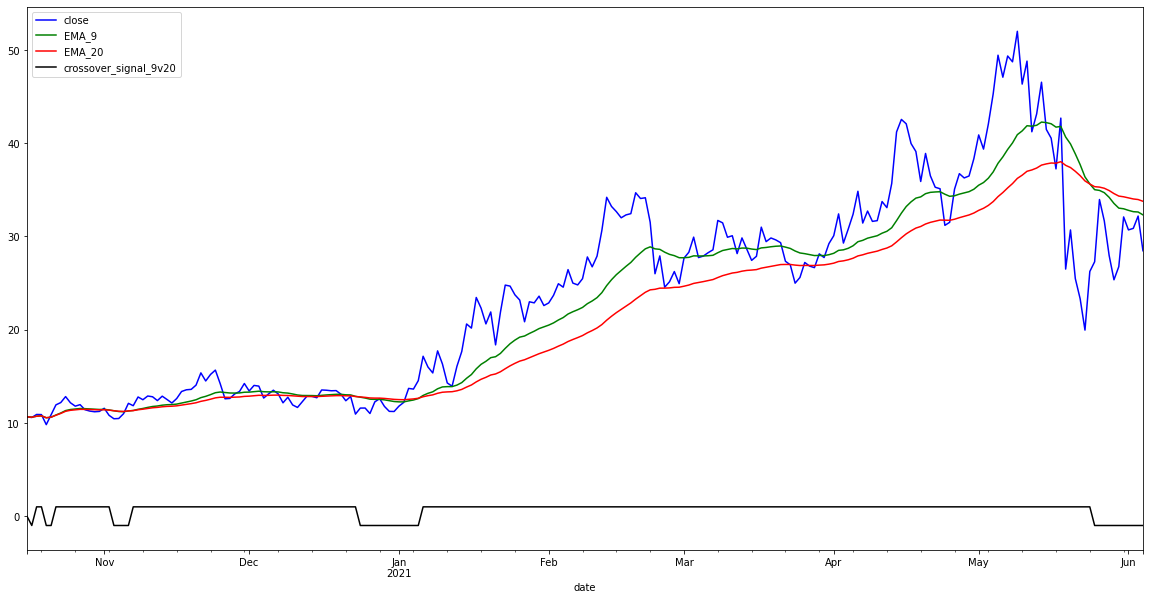

In [11]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20', 'crossover_signal_9v20']].plot(figsize=(20,10), color=['b', 'g', 'r', 'k'])

<AxesSubplot:xlabel='date'>

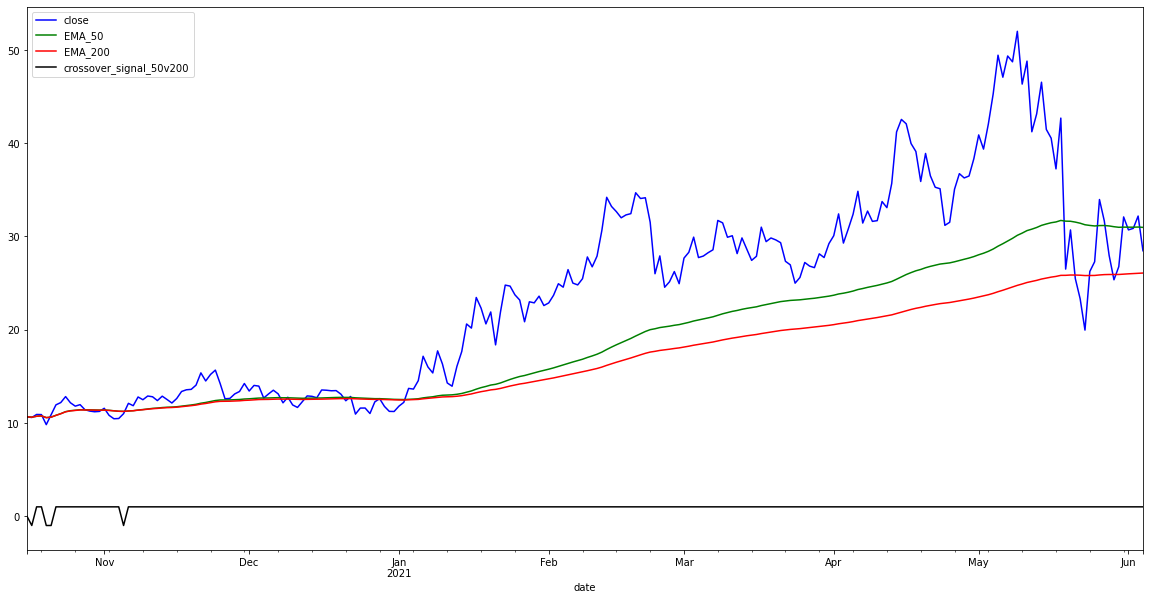

In [12]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_50', 'EMA_200', 'crossover_signal_50v200']].plot(figsize=(20,10), color=['b', 'g', 'r', 'k'])

<AxesSubplot:xlabel='date'>

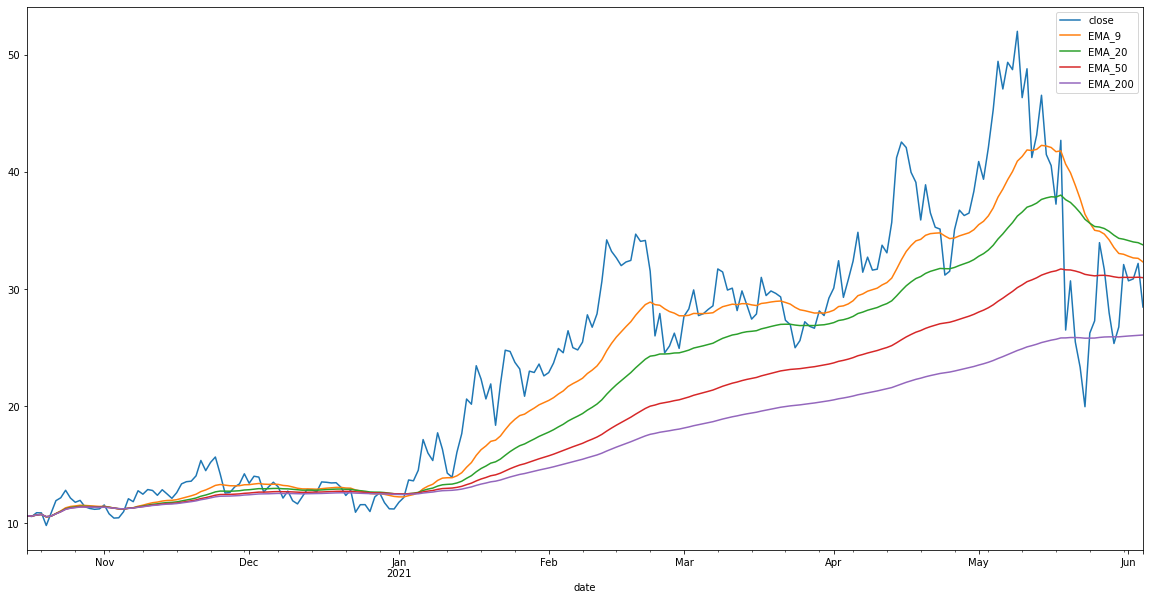

In [13]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20', 'EMA_50', 'EMA_200']].plot(figsize=(20,10))

### Construct Bollinger Band (Trading Signal, Feature Three)

In [14]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
historical_prices_df['bollinger_mid_band'] = historical_prices_df['close'].rolling(window=bollinger_window).mean()
historical_prices_df['bollinger_std'] = historical_prices_df['close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
historical_prices_df['bollinger_upper_band']  = historical_prices_df['bollinger_mid_band'] + (historical_prices_df['bollinger_std'] * 1)
historical_prices_df['bollinger_lower_band']  = historical_prices_df['bollinger_mid_band'] - (historical_prices_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
historical_prices_df['bollinger_long'] = np.where(historical_prices_df['close'] < historical_prices_df['bollinger_lower_band'], 1.0, 0.0)
historical_prices_df['bollinger_short'] = np.where(historical_prices_df['close'] > historical_prices_df['bollinger_upper_band'], -1.0, 0.0)
historical_prices_df['bollinger_signal'] = historical_prices_df['bollinger_long'] + historical_prices_df['bollinger_short']

historical_prices_df.iloc[50:60]

timestamp      open      high       low     close  \
date                                                                
2020-12-05  1607126400000  12.58801  13.69190  12.58801  13.10688   
2020-12-06  1607212800000  13.20477  14.00000  12.87182  13.50853   
2020-12-07  1607299200000  13.28565  13.28774  12.90000  13.11495   
2020-12-08  1607385600000  13.05938  13.16000  11.50000  12.15672   
2020-12-09  1607472000000  12.12000  12.79919  11.58395  12.75641   
2020-12-10  1607558400000  12.58801  12.60478  11.90000  11.92700   
2020-12-11  1607644800000  11.80000  12.12702  11.45223  11.66000   
2020-12-12  1607731200000  11.75311  12.37972  11.75311  12.27313   
2020-12-13  1607817600000  12.38000  13.25995  12.08893  12.89628   
2020-12-14  1607904000000  12.88848  12.95173  12.41940  12.85146   

                  volume       date  daily_return      EMA_9     EMA_20  ...  \
date                                                                     ...   
2020-12-05   3464.088749 2020-12-05      0.034533  13.328178  12.956155  ...   
2020-12-06   5346.637812 2020-12-06      0.030644  13.341795  12.978687  ...   
2020-12-07   2557.946122 2020-12-07     -0.029136  13.324691  12.984209  ...   
2020-12-08  12522.457069 2020-12-08     -0.073064  13.236741  12.950894  ...   
2020-12-09   8659.336956 2020-12-09      0.049330  13.200613  12.943113  ...   
2020-12-10   3833.942560 2020-12-10     -0.065019  13.104925  12.902697  ...   
2020-12-11  10147.108717 2020-12-11     -0.022386  12.996474  12.853550  ...   
2020-12-12   4061.572291 2020-12-12      0.052584  12.942233  12.830720  ...   
2020-12-13  11553.698352 2020-12-13      0.050774  12.938791  12.833285  ...   
2020-12-14   4204.759639 2020-12-14     -0.003475  12.932253  12.833993  ...   

            crossover_long_50v200  crossover_short_50v200  \
date                                                        
2020-12-05                    1.0                     0.0   
2020-12-06                    1.0                     0.0   
2020-12-07                    1.0                     0.0   
2020-12-08                    1.0                     0.0   
2020-12-09                    1.0                     0.0   
2020-12-10                    1.0                     0.0   
2020-12-11                    1.0                     0.0   
2020-12-12                    1.0                     0.0   
2020-12-13                    1.0                     0.0   
2020-12-14                    1.0                     0.0   

            crossover_signal_50v200  bollinger_mid_band  bollinger_std  \
date                                                                     
2020-12-05                      1.0           13.761372       0.915526   
2020-12-06                      1.0           13.805869       0.877915   
2020-12-07                      1.0           13.793117       0.886391   
2020-12-08                      1.0           13.723222       0.958379   
2020-12-09                      1.0           13.681093       0.982347   
2020-12-10                      1.0           13.574753       1.052488   
2020-12-11                      1.0           13.389407       1.046653   
2020-12-12                      1.0           13.278064       1.040722   
2020-12-13                      1.0           13.162900       0.939409   
2020-12-14                      1.0           13.022263       0.733136   

            bollinger_upper_band  bollinger_lower_band  bollinger_long  \
date                                                                     
2020-12-05             14.676898             12.845846             0.0   
2020-12-06             14.683784             12.927954             0.0   
2020-12-07             14.679508             12.906725             0.0   
2020-12-08             14.681600             12.764843             1.0   
2020-12-09             14.663439             12.698746             0.0   
2020-12-10             14.627241             12.522265             1.0   
2020-12-11  

### Plot Bollinger Bands

<AxesSubplot:xlabel='date'>

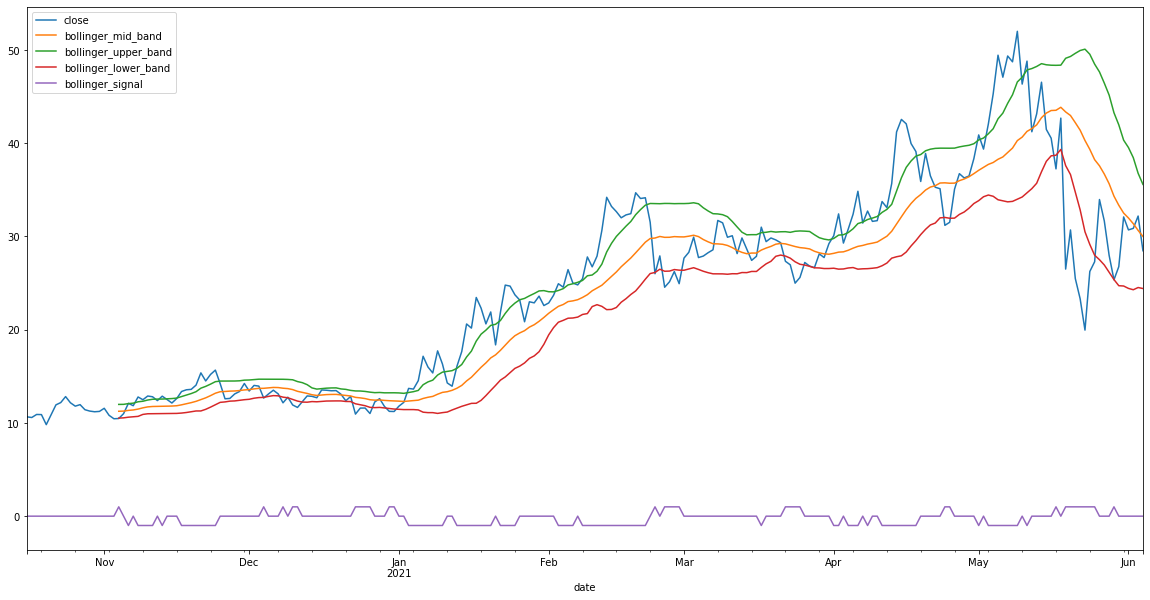

In [15]:
# Plot the Bollinger Bands for BTC/USD closing prices
historical_prices_df[['close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band', 'bollinger_signal']].plot(figsize=(20,10))

### Build MACD Signals

In [16]:

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
historical_prices_df['mac_fast_12'] = historical_prices_df['close'].ewm(span=12, adjust=False).mean()
historical_prices_df['mac_slow_26'] = historical_prices_df['close'].ewm(span=26, adjust=False).mean()

# Build the Macd line and the Signal Line
macd = historical_prices_df['mac_fast_12'] - historical_prices_df['mac_slow_26']
historical_prices_df['macd'] = macd
historical_prices_df['mac_signal_line_9ema'] = macd.ewm(span=9, adjust=False).mean()

# Calculate difference between macd and signal
macd_diff = historical_prices_df['macd'] - historical_prices_df['mac_signal_line_9ema']
historical_prices_df['macd_diff'] = macd_diff


# Construct a macd trading signal
historical_prices_df['macd_long'] = np.where(historical_prices_df['macd_diff'] > 0, 1.0, 0.0)
historical_prices_df['macd_short'] = np.where(historical_prices_df['macd_diff'] < 0, -1.0, 0.0)
historical_prices_df['macd_signal'] = historical_prices_df['macd_long'] + historical_prices_df['macd_short']


historical_prices_df.head(50)

timestamp      open      high       low     close  \
date                                                                
2020-10-16  1602806400000  10.49000  10.88079  10.37794  10.65000   
2020-10-17  1602892800000  10.50000  10.63435  10.44171  10.58217   
2020-10-18  1602979200000  10.76000  10.90737  10.76000  10.90737   
2020-10-19  1603065600000  10.73549  16.21371  10.73548  10.89289   
2020-10-20  1603152000000  10.84422  10.84422   9.81666   9.81666   
2020-10-21  1603238400000   9.84859  11.48999   9.84859  10.87379   
2020-10-22  1603324800000  12.10292  12.10292  11.90000  11.93695   
2020-10-23  1603411200000  11.85128  12.22066  11.56388  12.18427   
2020-10-24  1603497600000  12.11199  12.84346  12.11199  12.82296   
2020-10-25  1603584000000  12.57089  12.82563  11.87094  12.16142   
2020-10-26  1603670400000  12.13385  12.14330  11.34823  11.79823   
2020-10-27  1603756800000  11.78180  12.46694  11.54294  11.95968   
2020-10-28  1603843200000  12.06470  12.06470  11.20000  11.41815   
2020-10-29  1603929600000  11.63000  11.88080  11.20000  11.27000   
2020-10-30  1604016000000  11.19602  11.37585  10.75325  11.19802   
2020-10-31  1604102400000  11.14920  11.36771  11.01462  11.23408   
2020-11-01  1604188800000  11.12543  11.57000  11.07069  11.57000   
2020-11-02  1604275200000  11.57000  11.57000  10.72648  10.81365   
2020-11-03  1604361600000  10.77000  10.77000  10.09998  10.44821   
2020-11-04  1604448000000  10.26869  10.72048   9.79000  10.47369   
2020-11-05  1604534400000  10.51374  11.24761  10.13651  10.99343   
2020-11-06  1604620800000  11.03000  12.96660  11.03000  12.10049   
2020-11-07  1604707200000  12.37333  13.41661  11.50000  11.84772   
2020-11-08  1604793600000  11.57141  13.05572  11.50000  12.78295   
2020-11-09  1604880000000  12.57657  12.90424  11.70229  12.48769   
2020-11-10  1604966400000  12.45943  13.23414  12.25001  12.88586   
2020-11-11  1605052800000  13.25628  13.40000  12.80469  12.80469   
2020-11-12  1605139200000  12.70124  13.05546  11.65000  12.39484   
2020-11-13  1605225600000  12.53646  12.94997  12.49680  12.86906   
2020-11-14  1605312000000  12.82000  12.82000  12.30000  12.50993   
2020-11-15  1605398400000  12.52976  12.59664  11.88958  12.13615   
2020-11-16  1605484800000  12.05298  12.84529  12.05298  12.61859   
2020-11-17  1605571200000  12.63502  13.37713  12.59860  13.37000   
2020-11-18  1605657600000  13.37000  14.49999  12.63000  13.55462   
2020-11-19  1605744000000  13.44344  13.98000  13.02559  13.59899   
2020-11-20  1605830400000  13.64485  14.44861  13.51020  14.05379   
2020-11-21  1605916800000  14.15966  15.47000  13.73955  15.36693   
2020-11-22  1606003200000  15.50682  16.00000  13.87903  14.49998   
2020-11-23  1606089600000  14.58356  15.40000  14.18000  15.19956   
2020-11-24  1606176000000  15.29945  16.55224  14.99630  15.66419   
2020-11-25  1606262400000  15.56191  16.49999  13.40000  14.21002   
2020-11-26  1606348800000  14.21001  14.44538  11.00000  12.58801   
2020-11-27  1606435200000  12.41940  12.94575  11.76726  12.62775   
2020-11-28  1606521600000  12.42584  13.41707  12.37358  13.10696   
2020-11-29  1606608000000  13.00000  13.54999  12.58802  13.37198   
2020-11-30  1606694400000  13.41707  14.45075  13.41707  14.22792   
2020-12-01  1606780800000  14.22137  14.87180  11.52048  13.42204   
2020-12-02  1606867200000  13.28565  14.10042  13.10770  14.02190   
2020-12-03  1606953600000  13.97863  14.20248  13.64898  13.94796   
2020-12-04  1607040000000  13.95074  14.02903  12.56584  12.66937   

                  volume       date  daily_return      EMA_9     EMA_20  ...  \
date                                                                     ...   
2020-10-16   6823.127401 2020-10-16     -0.011142  10.650000  10.650000  ...   
2020-10-17   3157.443525 2020-10-17     -0.006369  10.614780  10.615497  ...   
2020-10-18   4705.611062 2020-10-18      0.030731  10.719910  10.716179  ...   
2020-10-19   3365.404948 20

<AxesSubplot:xlabel='date'>

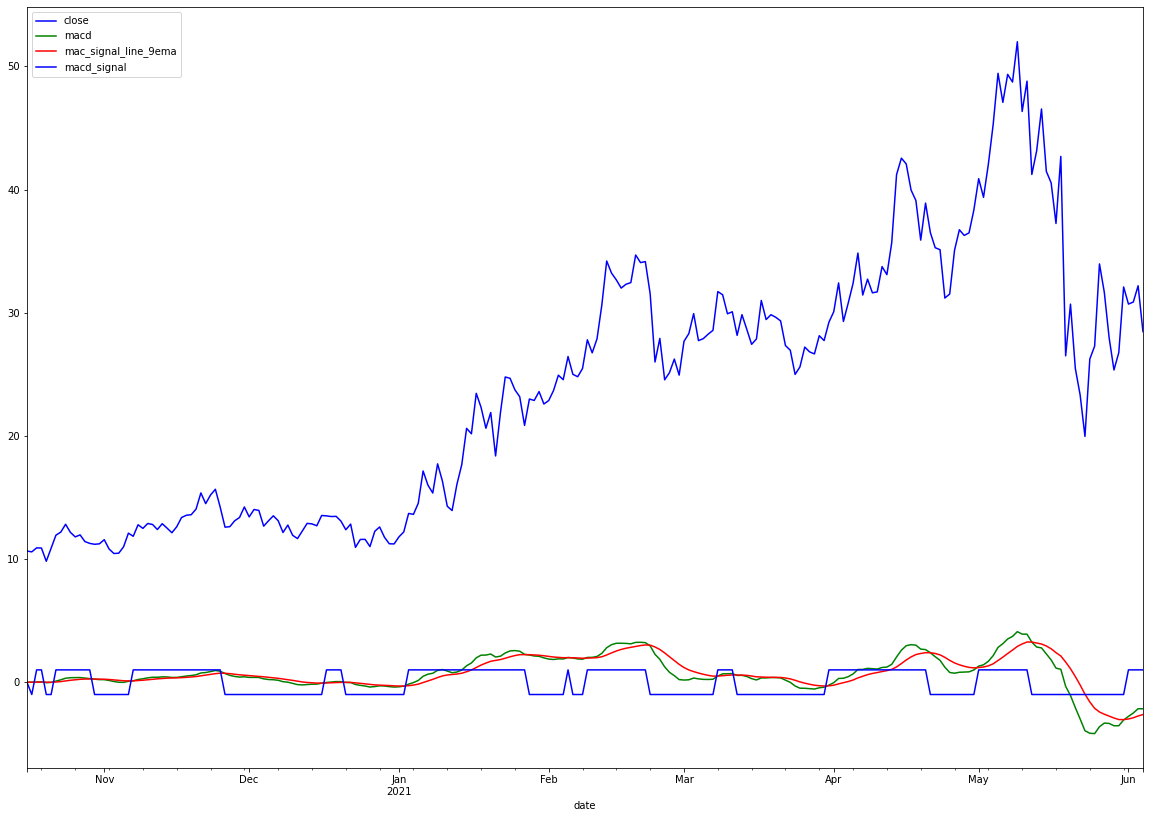

In [17]:
historical_prices_df[['close', 'macd','mac_signal_line_9ema', 'macd_signal']].plot(figsize=(20,14), color=['b', 'g', 'r', 'b'])

In [18]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200
bollinger_mid_band
bollinger_std
bollinger_upper_band
bollinger_lower_band
bollinger_long
bollinger_short
bollinger_signal
mac_fast_12
mac_slow_26
macd
mac_signal_line_9ema
macd_diff
macd_long
macd_short
macd_signal


### Define Strategies. 
 >  Strategy 1 = EMA50v200 + RSI + BB <br />
 > Strategy 2 = EMA50v200 + RSI + MACD <br />
 > Strategy 3 = EMA50v200 + EMA10v20 + MACD

In [19]:
# Set x variable list of features
st1_x_var_list = ['crossover_signal_50v200', 'bollinger_signal'] #'rsi_signal',
st2_x_var_list = ['crossover_signal_50v200', 'macd_signal'] #'rsi_signal',
# st3_x_var_list = ['crossover_signal_50v200', 'crossover_signal_9v20', 'macd_signal']
# Filter by x-variable list
strategy_1 = historical_prices_df[st1_x_var_list]
strategy_1['buy/sell'] = np.where(historical_prices_df['crossover_signal_50v200'] + historical_prices_df['bollinger_signal'] == 2, 1.0, 0.0)
strategy_1['buy/sell'] = np.where(historical_prices_df['crossover_signal_50v200'] + historical_prices_df['bollinger_signal'] == -1, -1.0, 0.0)
strategy_1.iloc[30:60]

crossover_signal_50v200  bollinger_signal  buy/sell
date                                                           
2020-11-15                      1.0               0.0       0.0
2020-11-16                      1.0               0.0       0.0
2020-11-17                      1.0              -1.0       0.0
2020-11-18                      1.0              -1.0       0.0
2020-11-19                      1.0              -1.0       0.0
2020-11-20                      1.0              -1.0       0.0
2020-11-21                      1.0              -1.0       0.0
2020-11-22                      1.0              -1.0       0.0
2020-11-23                      1.0              -1.0       0.0
2020-11-24                      1.0              -1.0       0.0
2020-11-25                      1.0               0.0       0.0
2020-11-26                      1.0               0.0       0.0
2020-11-27                      1.0               0.0       0.0
2020-11-28                      1.0               0.0       0.0
2020-11-29                      1.0               0.0       0.0
2020-11-30                      1.0               0.0       0.0
2020-12-01                      1.0               0.0       0.0
2020-12-02                      1.0               0.0       0.0
2020-12-03                      1.0               0.0       0.0
2020-12-04                      1.0               1.0       0.0
2020-12-05                      1.0               0.0       0.0
2020-12-06                      1.0               0.0       0.0
2020-12-07                      1.0               0.0       0.0
2020-12-08                      1.0               1.0       0.0
2020-12-09                      1.0               0.0       0.0
2020-12-10                      1.0               1.0       0.0
2020-12-11                      1.0               1.0       0.0
2020-12-12                      1.0               0.0       0.0
2020-12-13                      1.0               0.0       0.0
2020-12-14                      1.0               0.0       0.0

In [20]:
signals_df = historical_prices_df.loc[:, ['date', 'close', 'crossover_signal_50v200', 'bollinger_signal']].copy()

# Set the `date` column as the index
signals_df = signals_df.set_index("date", drop=True)

signals_df['Entry/Exit'] = np.where(historical_prices_df['crossover_signal_50v200'] + historical_prices_df['bollinger_signal'] == 2, 1.0, 0.0)

#signals_df.dropna(subset = ["SMA50", "SMA100", "Entry/Exit"], inplace=True)

# Print the DataFrame
signals_df.head(100)


## THIS BLOCK OF CODE NEEDS RE WORK. IT DOESN'T HAVE SELL SIGNAL

close  crossover_signal_50v200  bollinger_signal  Entry/Exit
date                                                                       
2020-10-16  10.65000                      0.0               0.0         0.0
2020-10-17  10.58217                     -1.0               0.0         0.0
2020-10-18  10.90737                      1.0               0.0         0.0
2020-10-19  10.89289                      1.0               0.0         0.0
2020-10-20   9.81666                     -1.0               0.0         0.0
...              ...                      ...               ...         ...
2021-01-19  20.62000                      1.0              -1.0         0.0
2021-01-20  21.90000                      1.0              -1.0         0.0
2021-01-21  18.37102                      1.0               0.0         0.0
2021-01-22  21.85367                      1.0              -1.0         0.0
2021-01-23  24.78098                      1.0              -1.0         0.0

[100 rows x 4 columns]

In [21]:
## Backtest the Trading Strategy

# Set initial capital
initial_capital = float(100000)

# Set the share size
share_size = 500

# Take a 500 share position where the dual moving average crossover is 1 (SMA50 is greater than SMA100)
signals_df['Position'] = share_size * signals_df['Entry/Exit']

# Find the points in time where a 500 share position is bought or sold
signals_df['Entry/Exit Position'] = signals_df['Position'].diff()

# Multiply share price by entry/exit positions and get the cumulatively sum
signals_df['Portfolio Holdings'] = signals_df['close'] * signals_df['Entry/Exit Position'].cumsum()

# Subtract the initial capital by the portfolio holdings to get the amount of liquid cash in the portfolio
signals_df['Portfolio Cash'] = initial_capital - (signals_df['close'] * signals_df['Entry/Exit Position']).cumsum()

# Get the total portfolio value by adding the cash amount by the portfolio holdings (or investments)
signals_df['Portfolio Total'] = signals_df['Portfolio Cash'] + signals_df['Portfolio Holdings']

# Calculate the portfolio daily returns
signals_df['Portfolio Daily Returns'] = signals_df['Portfolio Total'].pct_change()

# Calculate the cumulative returns
signals_df['Portfolio Cumulative Returns'] = (1 + signals_df['Portfolio Daily Returns']).cumprod() - 1

# Print the DataFrame
signals_df.tail(10)

close  crossover_signal_50v200  bollinger_signal  Entry/Exit  \
date                                                                          
2021-05-26  33.96000                      1.0               0.0         0.0   
2021-05-27  31.66111                      1.0               0.0         0.0   
2021-05-28  27.96737                      1.0               0.0         0.0   
2021-05-29  25.35096                      1.0               1.0         1.0   
2021-05-30  26.76105                      1.0               0.0         0.0   
2021-05-31  32.09140                      1.0               0.0         0.0   
2021-06-01  30.70134                      1.0               0.0         0.0   
2021-06-02  30.86564                      1.0               0.0         0.0   
2021-06-03  32.18700                      1.0               0.0         0.0   
2021-06-04  28.46590                      1.0               0.0         0.0   

            Position  Entry/Exit Position  Portfolio Holdings  Portfolio Cash  \
date                                                                            
2021-05-26       0.0               -500.0                0.00      112733.840   
2021-05-27       0.0                  0.0                0.00      112733.840   
2021-05-28       0.0                  0.0                0.00      112733.840   
2021-05-29     500.0                500.0            12675.48      100058.360   
2021-05-30       0.0               -500.0                0.00      113438.885   
2021-05-31       0.0                  0.0                0.00      113438.885   
2021-06-01       0.0                  0.0                0.00      113438.885   
2021-06-02       0.0                  0.0                0.00      113438.885   
2021-06-03       0.0                  0.0                0.00      113438.885   
2021-06-04       0.0                  0.0                0.00      113438.885   

            Portfolio Total  Portfolio Daily Returns  \
date                                                   
2021-05-26       112733.840                 0.030508   
2021-05-27       112733.840                 0.000000   
2021-05-28       112733.840                 0.000000   
2021-05-29       112733.840                 0.000000   
2021-05-30       113438.885                 0.006254   
2021-05-31       113438.885                 0.000000   
2021-06-01       113438.885                 0.000000   
2021-06-02       113438.885                 0.000000   
2021-06-03       113438.885                 0.000000   
2021-06-04       113438.885                 0.000000   

            Portfolio Cumulative Returns  
date                                      
2021-05-26                      0.127338  
2021-05-27                      0.127338  
2021-05-28                      0.127338  
2021-05-29                      0.127338  
2021-05-30                      0.134389  
2021-05-31                      0.134389  
2021-06-01                      0.134389  
2021-06-02                      0.134389  
2021-06-03                      0.134389  
2021-06-04                      0.134389

In [22]:
#Plot Entry/Exit Points of Backtest Results


# Visualize exit position relative to total portfolio value
exit = signals_df[signals_df['Entry/Exit'] == -1.0]['Portfolio Total'].hvplot.scatter(
    color='red',
    legend=False,
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Visualize entry position relative to total portfolio value
entry = signals_df[signals_df['Entry/Exit'] == 1.0]['Portfolio Total'].hvplot.scatter(
    color='green',
    legend=False,
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Visualize total portoflio value for the investment
total_portfolio_value = signals_df[['Portfolio Total']].hvplot(
    line_color='lightgray',
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Overlay plots
portfolio_entry_exit_plot = total_portfolio_value * entry * exit
portfolio_entry_exit_plot.opts(xaxis=None)

:Overlay
   .Curve.I                    :Curve   [date]   (Portfolio Total)
   .Scatter.Portfolio_Total.I  :Scatter   [date]   (Portfolio Total)
   .Scatter.Portfolio_Total.II :Scatter   [date]   (Portfolio Total)